In [1]:
import time

import gym
import gym_snake
from ml_tools import q_learning

import numpy as np
import matplotlib.pyplot as plt

# from ml_tools.ui import UI

# ui = UI()
# ui.connect("./public")

In [9]:
model_name = "01_model_game-trained"

# brain_name = "baseline"
# brain_name = "pre-trained/baseline"
# brain_name = "pre-trained/all-trainable"

brain_name = "fast-epsilon-decay/pre-trained/01_all-trainable"

load_pre_trained = True

In [10]:
from brain.v2.brain import Brain
from preprocessor.v1.preprocessor import Preprocessor

preprocessor = Preprocessor()
# preprocessor.ui = ui
brain = Brain(learning_rate=0.0001)
# brain.ui = ui

if load_pre_trained:
  pre_trained_name = "pre-trained"
  pre_trained_model_name = "00_model_pre-trained"
  
  brain.load_layers_and_compile_model(
    name=pre_trained_name, model_name=pre_trained_model_name, 
    num_layers=6, trainable=True
  )
  print("")
else:
  brain.build_and_compile_model()

brain.model.summary()

Loaded layer:
input_2
conv2d_2
max_pooling2d_2
conv2d_3
max_pooling2d_3
flatten_1

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        6176      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 64)          32832     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                          

In [11]:
agent = q_learning.Agent(
  action_space=[0, 1, 2, 3],

  brain=brain, preprocessor=preprocessor,

  epsilon_start = 1,
  epsilon_stop = 0.001,
  epsilon_decay_num_steps = 100,
  
  discount_factor=0.97,
  
  replay_batch_size=32*2,
  model_batch_size=16,

  steps_to_train=20,
  steps_to_update_target=40,

  replay_memory_max_len=50_000,
  replay_memory_min_len= 2_000,
)

env = gym.make("snake-v0")

score = 0
scores = []
epsilons = []

game_num = 0

In [ ]:
raw_observation = env.reset()
agent.reset(raw_observation)

while True:
  if game_num == 5_000:
    break
    
#   ui.video.update_stream("raw", raw_observation)

#   speed = int(ui.control.get_value("speed") or 100)
#   if speed != 100:
#     time.sleep(1 / speed)

#   agent.training = True if (ui.control.get_value("training") or "true") == "true" else False
  action = agent.act()
  raw_next_observation, reward, done, info = env.step(action)
  agent.step(reward, raw_next_observation)
  score += reward

  raw_observation = raw_next_observation
  if done:
    scores.append(score)
    epsilons.append(agent.epsilon)
    score = 0

    game_num += 1

    raw_observation = env.reset()
    agent.reset(raw_observation)

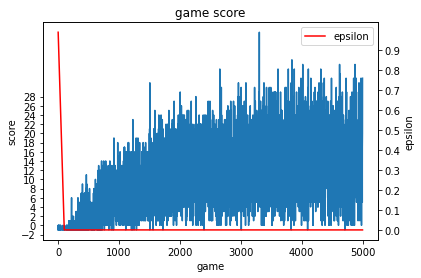

In [22]:
_, ax1 = plt.subplots()

plt.title("game score")
ax1.plot(scores)
ax1.set_xlabel("game")
ax1.set_ylabel("score")
ax1.set_yticks(np.arange(-2, 30, 2))

ax2 = ax1.twinx()
ax2.plot(epsilons, "r")
ax2.set_ylabel("epsilon")
ax2.set_yticks(np.arange(0, 1, 0.1))
ax2.legend(["epsilon"], loc="upper right")

plt.savefig(f"{brain.current_folder}/{brain_name}/game_score.jpg")
plt.show()

In [21]:
brain.save_model(name=brain_name, model_name=model_name)
agent.save_params(name=f"{brain.current_folder}/{brain_name}")

INFO:tensorflow:Assets written to: /Users/wiktorjurkiewicz/repos/00_PROJECTS/@_@_GENERAL/04_CODE/ML/snake-deep-q-learning/brain/v2/fast-epsilon-decay/pre-trained/01_all-trainable/01_model_game-trained/assets
